<h1 style="text-align: center; color: purple;" markdown="1">Final Project: Analysis on COVID-19 Mortality Rate</h1>
<h2 style="text-align: center; color: #012169" markdown="1">Diane Guan & Eric Xu & Carrick Zhu</h2>

### Table of Contents  
* [Introduction & Motivation](#anchor1)
* [Dataset Analysis](#anchor2)
* [Methodology & Empirical Model](#anchor3)
* [Results](#anchor4)
* [Conclusion](#anchor5)
* [Reference](#anchor6)

In [137]:
#Import other necesarry packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import matplotlib.pyplot as plt

# Introduction & Motivation<a class = anchor id = anchor1></a>




Since the first outbreak of COVID-19 back in December, 2019, human civilization has co-lived with the virus for almost two and a half years. As students at Emory, the coronavirus has forced our lectures to be held remotely for two semesters, which greatly affected our overall college experience. From stay home quarantines issued by each state and the unremitting efforts from pharmatheutical companies on developing the vaccines, the “curve” has been flattened in the United States and cases have decreased substantially. However, the reopening of colleges and universities in spring, 2022 precipitated an outbreak of severe, escalating COVID-19, consequently, forcing schools to take further efforts to prevent the spread of COVID-19. When students returned to campus last fall, colleges faced substantial challenges in handling coronavirus concerns while balancing students' campus experiences. 

Our group wanted to choose a topic related to COVID-19 since this experience will be remembered by our generation forever. As a result, we wanted to study the relationship between the COVID-19 mortality rates in each nation and the independent factors (Population, Median Age, Age over 65 Rate, GDP per Capita, and Total Vaccination), which might potentially reflect the state of the overall pandemic situation. This research is significant because it not only allows us to see the potential relationships between the dependent and independent variables, but also answers questions regarding the coronavirus such as whether vaccination is an effective method on preventing the spread of COVID-19. Our dataset comes from Coronavirus (COVID-19) Deaths by Hannah Ritchie, et.al., which contains COVID-19 cases, deaths, and other factors in all nations. 


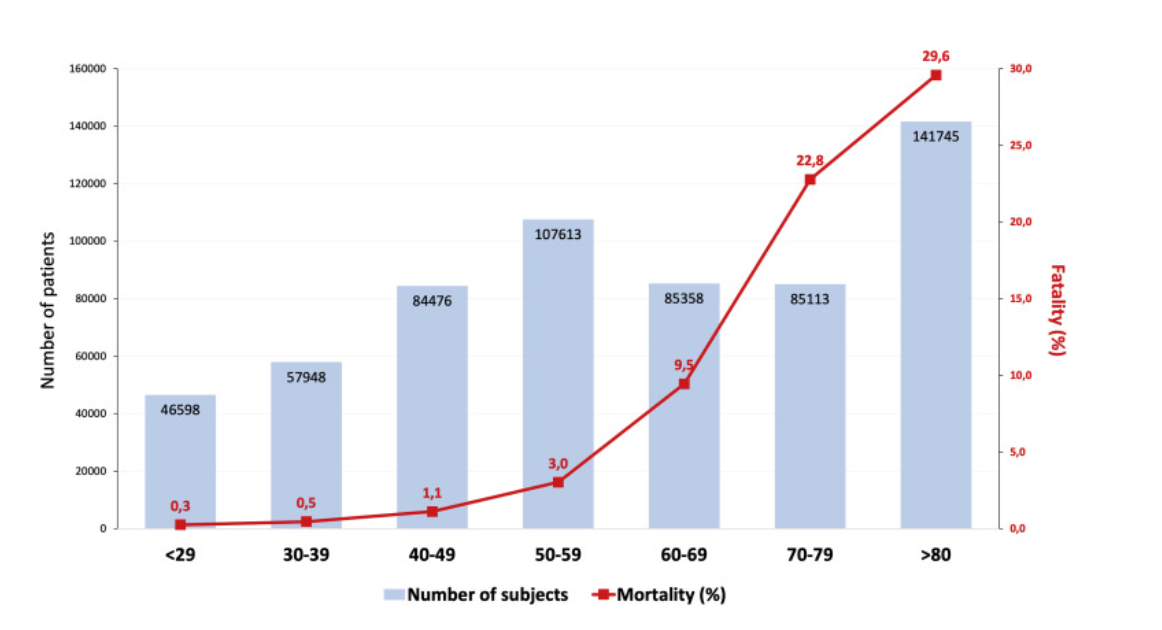

According to various studies, there is a substantial association between an individual's age and death rate: the elderly are more prone to encounter severe symptoms, which might result in following catastrophic diseases. As a consequence, we want to investigate the association between an individual's age and the COVID-19 mortality rate. We further divided an individual’s age in the dataset into two independent variables: the Median Age and people who are over 65 years gold. While the Median Age would provide us a basic understanding on the dataset, the group with only 65 years old and above would demonstrate the correlation between mortality rate and elders. 


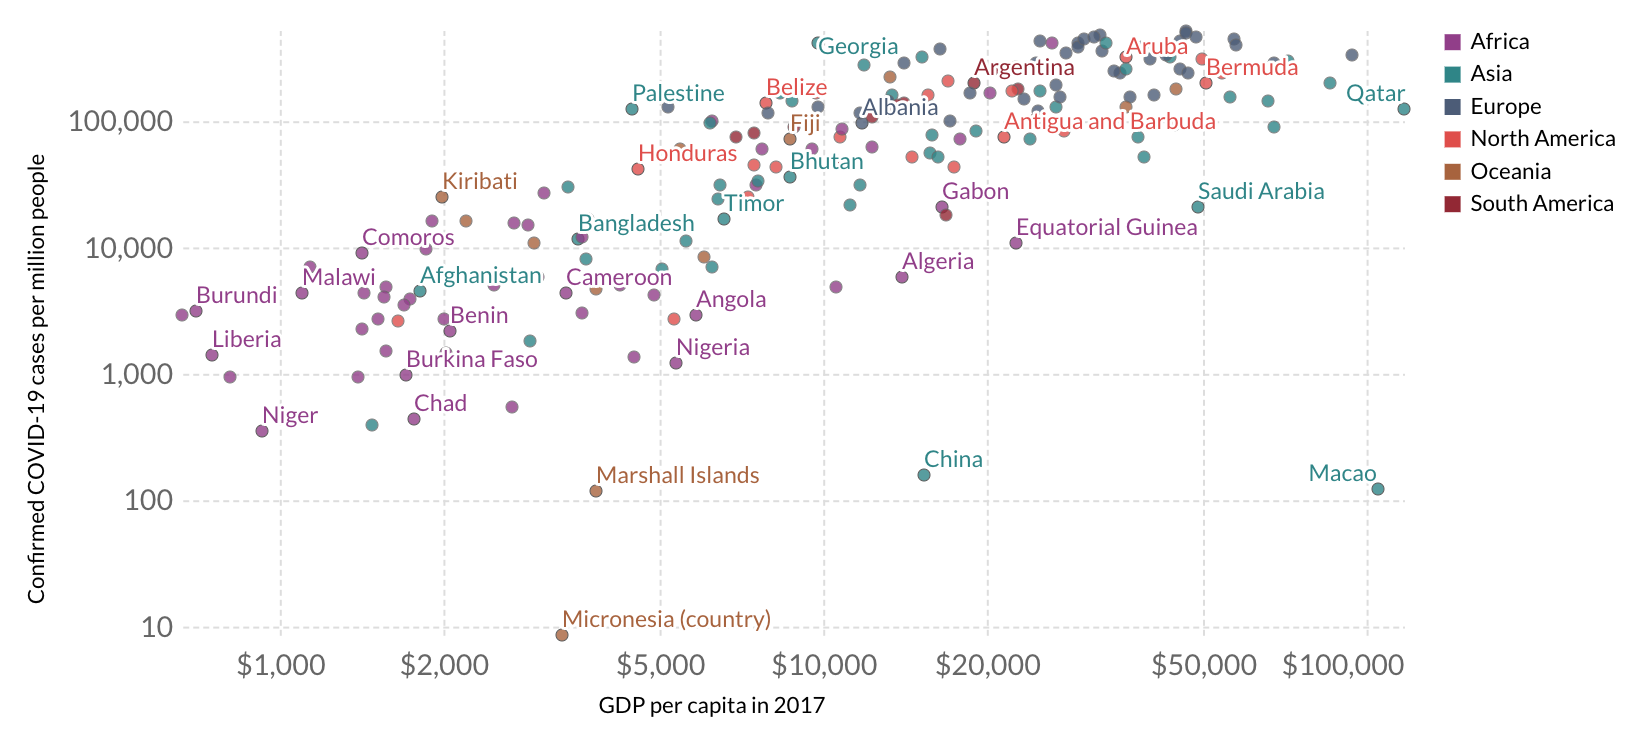
COVID-19 policy debates have often focused on two metrics: strong economic performance, as measured by GDP, and public health, as measured by COVID-19-related mortality. Localities that do better on one criteria, or both, are often seen to have had a more effective policy response than those that perform poorly. Thus, we want to incorporate GDP per-capita as an independent variable and investigate the relationship between GDP per capita and the COVID-19 mortality rate.

# Dataset Analysis<a class = anchor id = anchor2></a>

## Data Cleaning 

In [138]:
data = pd.read_csv("/Users/diane3426/Desktop/Lab 320/owid-covid-data (2).csv")

In [139]:
data = data[['date','total_deaths','total_cases','population','median_age','aged_65_older','gdp_per_capita','total_vaccinations']]

In [140]:
#Find missing data in each variables and remove unwanted missing data
data['total_deaths'].isna().sum()
data['population'].isna().sum()
data['median_age'].isna().sum()
data['aged_65_older'].isna().sum()
data['total_cases'].isna().sum()
data['gdp_per_capita'].isna().sum()
data['total_vaccinations'].isna().sum()
data = data.dropna()

#Filter Variable "date"= 2/10/22
data1=data[(data['date'] == '2022-02-10')]


#Create New varibale mortality_rate = total_deaths / total_cases
data1['mortality_rate'] = data1['total_deaths']/data1['total_cases']
print(data1.head())


             date  total_deaths  total_cases   population  median_age  \
6441   2022-02-10      123707.0    8700437.0   45605823.0        31.9   
7853   2022-02-10         196.0      33436.0     107195.0        41.2   
9351   2022-02-10        4479.0    2854123.0   25788217.0        37.9   
10780  2022-02-10        8972.0     725777.0   10223344.0        32.4   
21330  2022-02-10      636338.0   27135550.0  213993441.0        33.5   

       aged_65_older  gdp_per_capita  total_vaccinations  mortality_rate  
6441          11.198       18933.907          90146946.0        0.014218  
7853          13.085       35973.781            167119.0        0.005862  
9351          15.504       44648.710          51948284.0        0.001569  
10780          6.018       15847.419          12349272.0        0.012362  
21330          8.552       14103.452         375028165.0        0.023450  


<ipython-input-140-de16973777fe>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['mortality_rate'] = data1['total_deaths']/data1['total_cases']


## Summary Statistics

Prior to any data analysis, it is important to understand our sample population. In our research, five sets of numerical variables are involved. While our dependent variable is the mortality rate = total death/total cases, our independent variables include vaccines, gdp, age, elder, and population.

In [141]:
data1[["mortality_rate","population","median_age","aged_65_older","gdp_per_capita","total_vaccinations"]].describe()

,mortality_rate,population,median_age,aged_65_older,gdp_per_capita,total_vaccinations
count,50.000000,5.000000e+01,50.000000,50.000000,50.000000,5.000000e+01
mean,0.014323,2.585761e+08,35.392000,11.506400,25769.221580,3.650366e+08
std,0.011008,1.134499e+09,7.277694,6.294018,19864.374453,1.516144e+09
min,0.001569,1.071950e+05,17.700000,1.144000,1899.775000,1.671190e+05
25%,0.007661,4.113414e+06,30.675000,6.086750,13551.536750,4.581028e+06
50%,0.011580,1.290836e+07,35.900000,11.031000,23161.312500,1.802850e+07
75%,0.019217,6.755500e+07,41.350000,16.222500,34698.143000,1.284684e+08
max,0.059828,7.874966e+09,47.900000,23.021000,116935.600000,1.031577e+10


## Visual Examination of Dataset

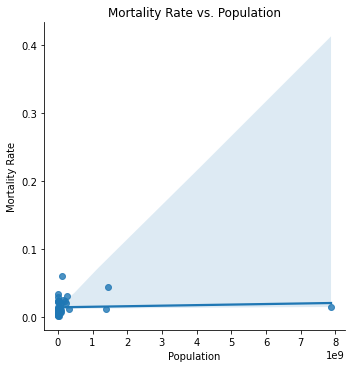

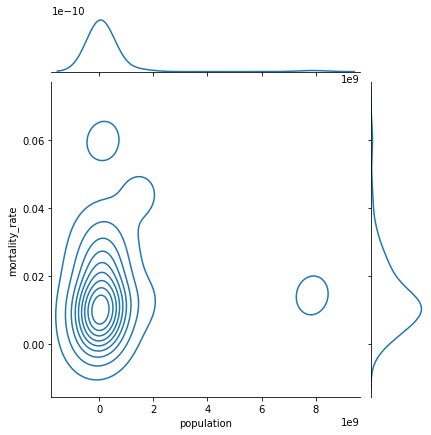

In [78]:
# Scatter Plot: Mortality Rate vs. Population
sns.lmplot(x="population", y="mortality_rate", data=data1).set(title ="Mortality Rate vs. Population", 
                                      xlabel = "Population", 
                                      ylabel = "Mortality Rate");

sns.jointplot(x=data1["population"], y=data1["mortality_rate"], kind='kde')

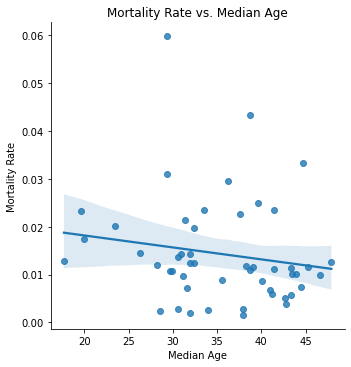

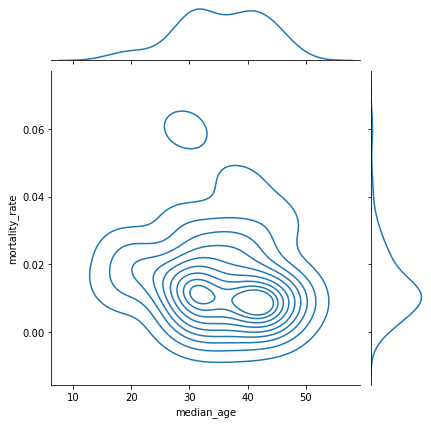

In [79]:
# Scatter Plot: Mortality Rate vs. median_age
sns.lmplot(x="median_age", y="mortality_rate", data=data1).set(title ="Mortality Rate vs. Median Age", 
                                      xlabel = "Median Age", 
                                      ylabel = "Mortality Rate");

sns.jointplot(x=data1["median_age"], y=data1["mortality_rate"], kind='kde')

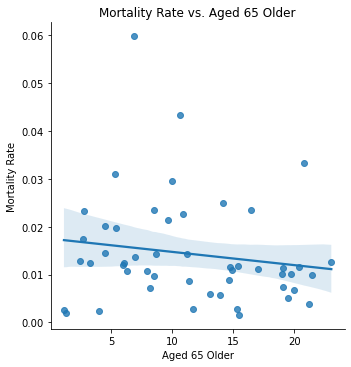

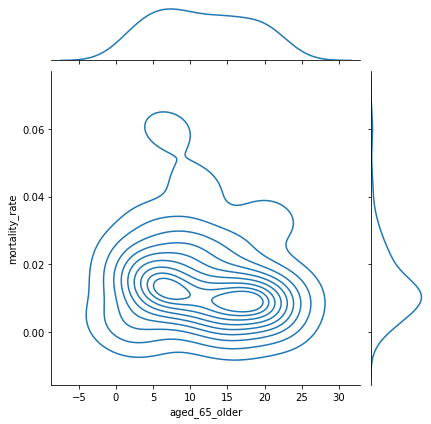

In [80]:
# Scatter Plot: Mortality Rate vs. aged_65_older
sns.lmplot(x="aged_65_older", y="mortality_rate", data=data1).set(title ="Mortality Rate vs. Aged 65 Older", 
                                      xlabel = "Aged 65 Older", 
                                      ylabel = "Mortality Rate");
sns.jointplot(x=data1["aged_65_older"], y=data1["mortality_rate"], kind='kde')


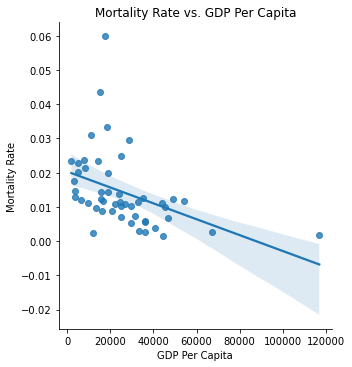

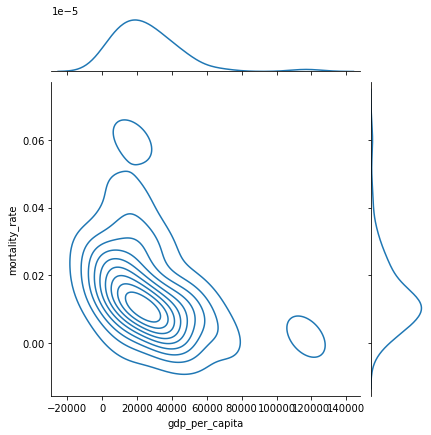

In [81]:
# Scatter Plot: Mortality Rate vs. median_age
sns.lmplot(x="gdp_per_capita", y="mortality_rate", data=data1).set(title ="Mortality Rate vs. GDP Per Capita", 
                                      xlabel = "GDP Per Capita", 
                                      ylabel = "Mortality Rate");

sns.jointplot(x=data1["gdp_per_capita"], y=data1["mortality_rate"], kind='kde')

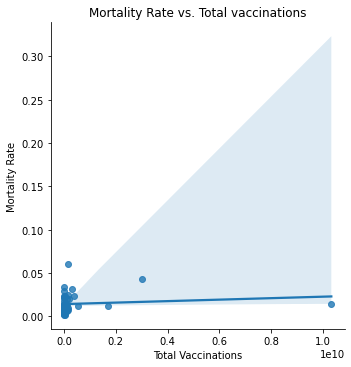

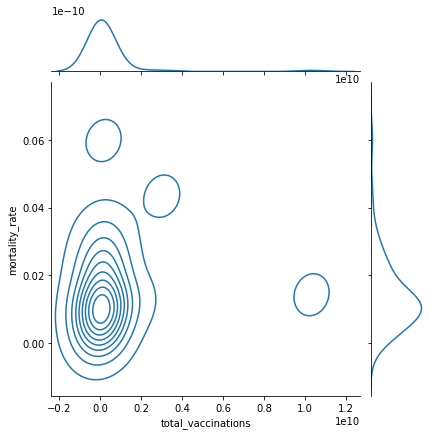

In [87]:
# Scatter Plot: Mortality Rate vs. median_age
sns.lmplot(x="total_vaccinations", y="mortality_rate", data=data1).set(title ="Mortality Rate vs. Total vaccinations", 
                                      xlabel = "Total Vaccinations", 
                                      ylabel = "Mortality Rate");

sns.jointplot(x=data1["total_vaccinations"], y=data1["mortality_rate"], kind='kde')

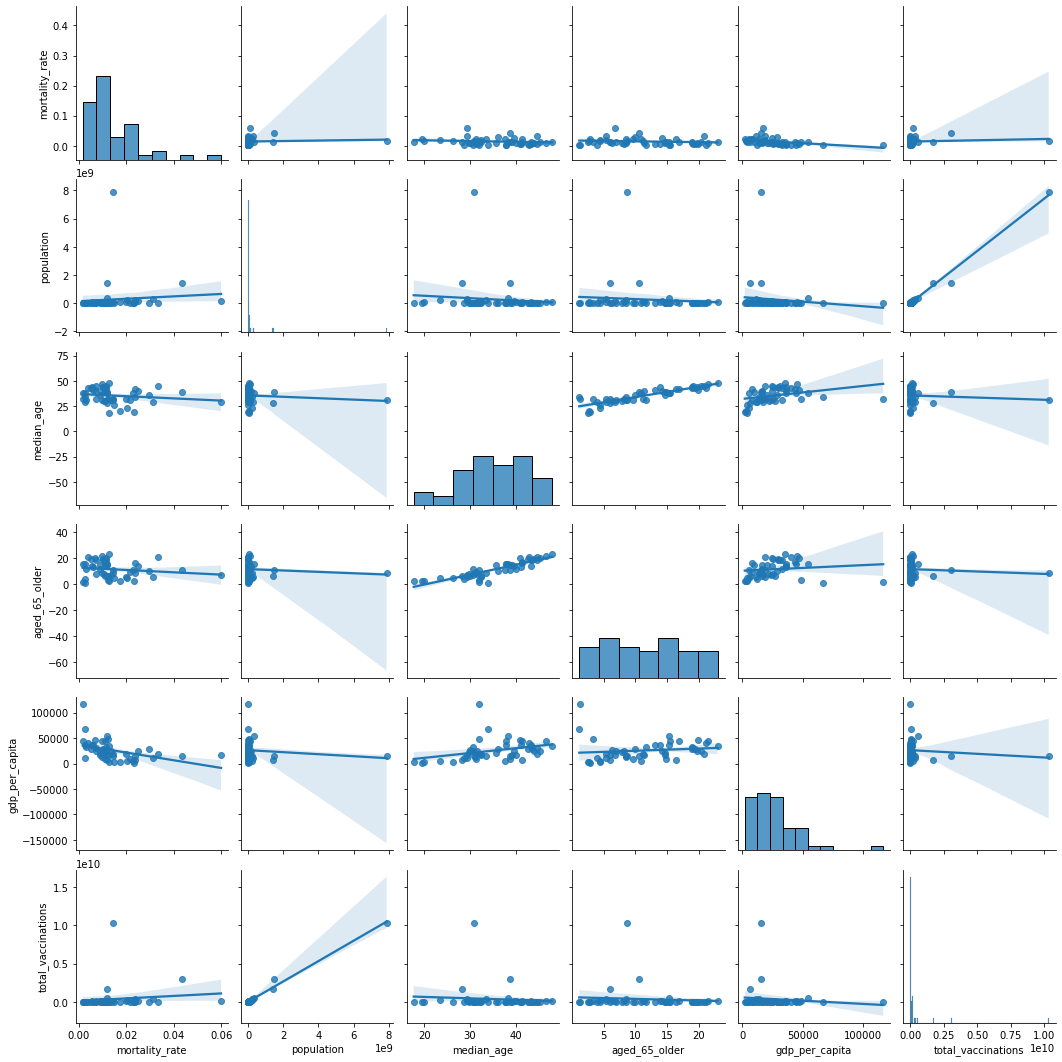

In [91]:
#Correlation Matrixs for All Variables
data2 = data1[["mortality_rate","population","median_age","aged_65_older","gdp_per_capita","total_vaccinations"]]
sns.pairplot(data2, kind="reg")

- Mortality Rate vs. Population: According to our simple linear regression fit, there is no statistically significant relationship between death rate and population. However, our graph has multiple outliers, which may contribute to the insignificance of the result we got. 
- Mortality Rate vs. Median Age: According to our simple linear regression fit, the mortality rate and median age have a negative relationship. However, the link is not significant due to the dispersion of the data points.
- Mortality Rate vs. Age over 65: According to our simple linear regression fit, the mortality rate and Age over 65 have a negative relationship. However, the link is not significant due to the dispersion of the data points. The outcome contradicts our expectations, since a larger amount of elderly is expected to lead to a higher death rate.
- Mortality Rate vs. GDP Per Capita: According to our simple linear regression fit, the mortality rate and GDP Per Capita have a positive relationship. The link is relative significant comparing to other varibles that we included. The graph support our expectations that higher is expected to lead to a lower death rate.
- Mortality Rate vs. Total Vaccinations: According to our simple linear regression fit, there is no statistically significant relationship between death rate and population. However, our graph has multiple outliers, which may contribute to the insignificance of the result we got. 

# Methodology & Empirical Model<a class = anchor id = anchor3></a>

We are trying to find the correlations between Mortality Rate of Covid and possible factors of population that could influence Mortality Rate. We are considering Population, Median Age, Age over 65 rate, GDP Per Capita and Total Vaccinations. As a result, we came up with a multiple linear regression model in order to investigate the potential relationship between COVID-19 mortality rates in nations and the independent factors, which might potentially reflect the state of the overall pandemic situations. 

#### Preliminary Model: 

$$Mortality Rate = \hat\beta_0 + \hat\beta_1 * Population + \hat\beta_2 * MedianAge+ \hat\beta_3 * AgeOver65Rate+ \hat\beta_4 * GDPPerCapita + \hat\beta_5 * TotalVaccinations + \mu$$

- Population: The population represents the population of the United States, which is our observation subject.


- Median Age: The median age is included as an independent variable because it is less affected by potential outliers and skewed data than the mean, especially when the distribution is not symmetrical. 


- Age Over 65 Rate: As mentioned earlier, this is often a substantial association between age and death rate. To be more specific, the elderly are more prone to encounter severe symptoms caused by COVID-19. As a result, we included people who are 65 and over as one of our independent variables in order to seek the relationship.


- GDP Per Capita: GDP per Capita measures the economic performance of a country, which allows us to observe the potential economic effect of the Coronavrius on a country. 


- Total Vaccinations: Last but not least, according to CDC, COVID-19 vaccines are effective at preventing infections, serious symptoms, and death caused by the coronavirus. As a result, total vaccination is taken into consideration as an independent variable in our empirical formula. 

### Hypothesis: 
#### With these five variables as regressors, we would expect $\hat\beta_4$ (GDP per Capita) to be positive, $\hat\beta_3$ (Age over 65), $\hat\beta_2$(Median age) to be negative, and $\hat\beta_1$ (Population) and $\hat\beta_5$ (Total Vaccination) have no statistically significant relationship. 





# Results<a class = anchor id = anchor4></a>

In [144]:
# set each regression
m1 = smf.ols(formula = "mortality_rate ~ population", data = data1).fit()
m2 = smf.ols(formula = "mortality_rate ~ population + median_age", data = data1).fit()
m3 = smf.ols(formula = "mortality_rate ~ population + median_age + aged_65_older", data = data1).fit()
m4 = smf.ols(formula = "mortality_rate ~ population + median_age + aged_65_older + gdp_per_capita", data = data1).fit()
m5 = smf.ols(formula = "mortality_rate ~ population + median_age + aged_65_older + gdp_per_capita + total_vaccinations", data = data1).fit()

In [145]:
#view the results using a stargazer table
st = Stargazer([m1, m2, m3, m4, m5])
from IPython.core.display import HTML
HTML(st.render_html())

From the models, we can see that the independent variables are not significant at all significance levels. Therefore, we fail to reject the null hypothesis that the variables do not affect the mortality rate. However, the correlation shows that mortality rate is related. For vaccination, the reason why it is not significant could be that the dataset contains insufficient numbers of vaccination of the population. For Median Age and Age over 65 rate, the correlation is weak from the data. For GDP, the significance level is very high, we assume that the correlation is very small thus it appears to approach zero. In conclusion, we fail to reject the null hypothesis and discover that the independent variables cannot affect mortality rate. 


# Conclusion<a class = anchor id = anchor5></a>

In all, our project attempted to investigate whether GDP per Capita, Age over 65, Median age, Population and Total Vaccination affect mortality rate in the areas of the dataset. Through our study, we discovered that there is no significant association between these variables. Moreover, there is insufficient evidence suggesting that there is an effect on mortality rate. After a thorough review on our model, the model itself is reasonable and correct. As a result, we believe that our dataset is not sufficient enough and contains multiple outliers, consequently, failing to reject the null hypothesis. For the next step, we ought to update our dataset with more useful data and less outliers in order to studying the correlations with mortality rate. 

# Reference<a class = anchor id = anchor6></a>

- Cumulative confirmed COVID-19 cases per million vs. GDP per capita. (2022, April 24). Our World in Data. https://ourworldindata.org/grapher/total-confirmed-cases-of-covid-19-per-million-people-vs-gdp-per-capita
- "The effect of vitamin D supplementation on mortality and Intensive Care Unit Admission of Covid‐19 patients. A systematic review, meta‐analysis and meta‐regression". (2021). The Effect of Age on Mortality in Patients With COVID-19: A Meta-Analysis With 611,583 Subjects. https://doi.org/10.1002/dmrr.3517/v1/review2 

In [146]:
!jupyter nbconvert --to html FInalProject_320Lab.ipynb

[NbConvertApp] Converting notebook FInalProject_320Lab.ipynb to html
[NbConvertApp] Writing 1746797 bytes to FInalProject_320Lab.html
